<a href="https://colab.research.google.com/github/djliden/deep_learning_practice/blob/main/test_set_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade fastai

     |████████████████████████████████| 194kB 5.3MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
import pandas as pd
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

df = pd.read_csv(path/'train.csv')

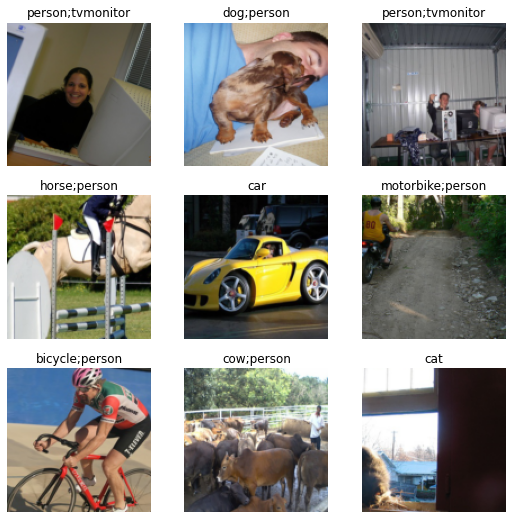

In [104]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')

def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x = get_x,
                   get_y = get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))

dls = dblock.dataloaders(df)
dls.show_batch()

In [4]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when 'inp' and 'targ' are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

learn = cnn_learner(dls, resnet34, metrics=partial(accuracy_multi, thresh=0.2))
learn.metrics = partial(accuracy_multi, thresh=0.5)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [5]:
learn.fine_tune(2) # just a few epochs because we're mostly interested in figuring out the test set.

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.922935,0.619722,0.673227,00:28


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.694580,0.489309,0.801932,00:28
1,0.587538,0.408976,0.879263,00:28


In [36]:
# Make a test set. Start with a minimal working example.
testdf = pd.read_csv(path/'test.csv')
def get_test_example(r): return path/'test'/r['fname']
a = [(path/'test'/testdf.iloc[0,0], ['dog', 'person'])]
a

[(Path('/root/.fastai/data/pascal_2007/test/000001.jpg'), ['dog', 'person'])]

In [72]:
fnames = [str((path/'test'/testdf.iloc[i,0])) for i in range(len(testdf))]
labels = [testdf.iloc[i,1].split(' ') for i in range(len(testdf))]

In [76]:
testset = test_set(dls.valid_ds, fnames ,with_labels=False); testset

(#4952) [(PILImage mode=RGB size=353x500,),(PILImage mode=RGB size=335x500,),(PILImage mode=RGB size=500x375,),(PILImage mode=RGB size=500x406,),(PILImage mode=RGB size=500x375,),(PILImage mode=RGB size=500x375,),(PILImage mode=RGB size=354x480,),(PILImage mode=RGB size=500x324,),(PILImage mode=RGB size=500x375,),(PILImage mode=RGB size=500x333,)...]

In [105]:
def get_test_x(r): return path/'test'/r['fname']
def get_y(r): return r['labels'].split(' ')

dblocktest = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                   get_x = get_test_x,
                   get_y = get_y)



In [94]:
#MultiCategoryBlock(labels)
type(labels)

list

In [106]:
testdss = dblocktest.datasets(testdf)

In [ ]:
testset = test_set(dblock.datasets(df), testdss, with_labels=False)